<a href="https://colab.research.google.com/github/JS-DS-coder/MITMachineLearning/blob/main/Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import framework
import utils

In [6]:
DEBUG = False

GAMMA = 0.5  # discounted factor
TRAINING_EP = 0.5  # epsilon-greedy parameter for training
TESTING_EP = 0.05  # epsilon-greedy parameter for testing
NUM_RUNS = 10
NUM_EPOCHS = 200
NUM_EPIS_TRAIN = 25  # number of episodes for training at each epoch
NUM_EPIS_TEST = 50  # number of episodes for testing
ALPHA = 0.1  # learning rate for training

ACTIONS = framework.get_actions()
OBJECTS = framework.get_objects()
NUM_ACTIONS = len(ACTIONS)
NUM_OBJECTS = len(OBJECTS)

In [14]:
def epsilon_greedy(state_1, state_2, q_func, epsilon):
    """Returns an action selected by an epsilon-Greedy exploration policy

    Args:
        state_1, state_2 (int, int): two indices describing the current state
        q_func (np.ndarray): current Q-function
        epsilon (float): the probability of choosing a random command

    Returns:
        (int, int): the indices describing the action/object to take
    """
    # TODO Your code here
    if np.random.binomial(1, epsilon):
        # Randomly choose action and object
        action_index, object_index = np.random.randint(NUM_ACTIONS, size=1), \
                                     np.random.randint(NUM_OBJECTS, size=1)
    else:
        # Choose the best action and object
        action_index, object_index = np.unravel_index(np.argmax(q_func[
                                                                state_1,
                                                                state_2,
                                                                :, :]),
                                                      (NUM_ACTIONS, NUM_OBJECTS))
    return (int(action_index), int(object_index))


# pragma: coderesponse end


# pragma: coderesponse template
def tabular_q_learning(q_func, current_state_1, current_state_2, action_index,
                       object_index, reward, next_state_1, next_state_2,
                       terminal):
    """Update q_func for a given transition

    Args:
        q_func (np.ndarray): current Q-function
        current_state_1, current_state_2 (int, int): two indices describing the current state
        action_index (int): index of the current action
        object_index (int): index of the current object
        reward (float): the immediate reward the agent recieves from playing current command
        next_state_1, next_state_2 (int, int): two indices describing the next state
        terminal (bool): True if this episode is over

    Returns:
        None
    """
    # TODO Your code here
    maxq = 0
    if terminal:
        maxq = 0
    else:
        maxq = np.max(q_func[next_state_1, next_state_2, :, :])

    q_func[current_state_1, current_state_2, action_index,
           object_index] = (1 - ALPHA) * q_func[current_state_1, current_state_2,
                                                action_index, object_index] + \
                           ALPHA * (reward + GAMMA * maxq)

    return None  # This function shouldn't return anything


In [15]:

# pragma: coderesponse template
def run_episode(for_training):
    """ Runs one episode
    If for training, update Q function
    If for testing, computes and return cumulative discounted reward

    Args:
        for_training (bool): True if for training

    Returns:
        None
    """
    epsilon = TRAINING_EP if for_training else TESTING_EP

    # initialize for each episode
    epi_reward = 0.0

    (current_room_desc, current_quest_desc, terminal) = framework.newGame()

    while not terminal:
        # Choose next action and execute
        current_room_desc_index = dict_room_desc[current_room_desc]
        current_quest_desc_index = dict_quest_desc[current_quest_desc]  # Get room and quest indices

        next_action_index, next_object_index = epsilon_greedy(current_room_desc_index,
                                                              current_quest_desc_index,
                                                              q_func,
                                                              epsilon)  # Get next action/object

        next_room_desc, next_quest_desc, reward, terminal = framework.step_game(
            current_room_desc,
            current_quest_desc,
            next_action_index,
            next_object_index)  # Take a step

        # Only need room index; quest remains same during an episode
        next_room_desc_index = dict_room_desc[next_room_desc]

        if for_training:
            # update Q-function.
            tabular_q_learning(q_func, current_room_desc_index, current_quest_desc_index,
                               next_action_index, next_object_index, reward,
                               next_room_desc_index, current_quest_desc_index,
                               terminal)

        if not for_training:
            # update reward
            epi_reward += (GAMMA ** (framework.STEP_COUNT - 1)) * reward

            # prepare next step
        current_room_desc, current_quest_desc = next_room_desc, next_quest_desc

    if not for_training:
        return epi_reward

In [16]:
def run_epoch():
    """Runs one epoch and returns reward averaged over test episodes"""
    rewards = []

    for _ in range(NUM_EPIS_TRAIN):
        run_episode(for_training=True)

    for _ in range(NUM_EPIS_TEST):
        rewards.append(run_episode(for_training=False))

    return np.mean(np.array(rewards))

Avg reward: 0.497799 | Ewma reward: 0.513534: 100%|█| 200/200 [00:06<00:00, 32.9
Avg reward: 0.498087 | Ewma reward: 0.520289: 100%|█| 200/200 [00:06<00:00, 30.6
Avg reward: 0.493790 | Ewma reward: 0.515101: 100%|█| 200/200 [00:06<00:00, 31.1
Avg reward: 0.497649 | Ewma reward: 0.512734: 100%|█| 200/200 [00:06<00:00, 30.7
Avg reward: 0.508471 | Ewma reward: 0.527028: 100%|█| 200/200 [00:06<00:00, 31.2
Avg reward: 0.487910 | Ewma reward: 0.518284: 100%|█| 200/200 [00:06<00:00, 30.9
Avg reward: 0.498824 | Ewma reward: 0.511804: 100%|█| 200/200 [00:06<00:00, 29.7
Avg reward: 0.502137 | Ewma reward: 0.532501: 100%|█| 200/200 [00:06<00:00, 31.4
Avg reward: 0.499517 | Ewma reward: 0.507688: 100%|█| 200/200 [00:06<00:00, 31.2
Avg reward: 0.493698 | Ewma reward: 0.507220: 100%|█| 200/200 [00:07<00:00, 27.1


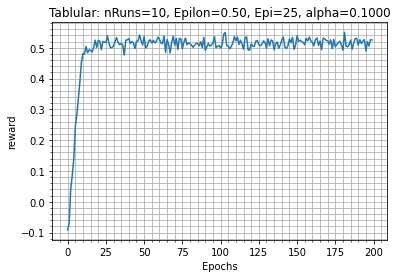

In [18]:
def run():
    """Returns array of test reward per epoch for one run"""
    global q_func
    q_func = np.zeros((NUM_ROOM_DESC, NUM_QUESTS, NUM_ACTIONS, NUM_OBJECTS))

    single_run_epoch_rewards_test = []
    pbar = tqdm(range(NUM_EPOCHS), ncols=80)
    for _ in pbar:
        single_run_epoch_rewards_test.append(run_epoch())
        pbar.set_description(
            "Avg reward: {:0.6f} | Ewma reward: {:0.6f}".format(
                np.mean(single_run_epoch_rewards_test),
                utils.ewma(single_run_epoch_rewards_test)))
    return single_run_epoch_rewards_test


if __name__ == '__main__':
    # Data loading and build the dictionaries that use unique index for each state
    (dict_room_desc, dict_quest_desc) = framework.make_all_states_index()
    NUM_ROOM_DESC = len(dict_room_desc)
    NUM_QUESTS = len(dict_quest_desc)

    # set up the game
    framework.load_game_data()

    epoch_rewards_test = []  # shape NUM_RUNS * NUM_EPOCHS

    for _ in range(NUM_RUNS):
        epoch_rewards_test.append(run())

    epoch_rewards_test = np.array(epoch_rewards_test)

    x = np.arange(NUM_EPOCHS)
    fig, axis = plt.subplots()
    axis.plot(x, np.mean(epoch_rewards_test,
                         axis=0))  # plot reward per epoch averaged per run
    axis.set_xlabel('Epochs')
    axis.set_ylabel('reward')
    axis.set_title(('Tablular: nRuns=%d, Epilon=%.2f, Epi=%d, alpha=%.4f' %
                    (NUM_RUNS, TRAINING_EP, NUM_EPIS_TRAIN, ALPHA)))
    plt.grid(which="both") 
    plt.minorticks_on()
    plt.show()